<a href="https://colab.research.google.com/github/shengwenLeong/Colab/blob/main/GraphSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform

In [4]:
class ConstructKnnGraph:
  def __init__(self, vertex_number, k_value):
    self.G = nx.DiGraph()
    self.vertex_number = vertex_number
    self.k_value = k_value
  
  def KnnGraph(self):
    data = np.random.rand(self.vertex_number,2)
    for i in range(data.shape[0]):
      self.G.add_node(i, pos=(data[i][0], data[i][1]))
      self.G.add_node(i, prop=1)
      self.G.add_node(i, accum=0)
    for i in range(data.shape[0]):
      query = data[i]
      dist = {}
      for t in range(data.shape[0]):
        if t==i:
          continue
        dist[t] = np.linalg.norm(data[t] - query)
        #print("query={}, nn={}, distance={}".format(i,t,dist))
      vertexSort = sorted(dist.items(), key=lambda dist:dist[1], reverse=False)[:self.k_value]
      for vertex in vertexSort:
        self.G.add_edge(i, vertex[0])
        #print("edge=({},{})".format(i, vertex[0]))
  def DrawGraph(self):
    node_pos = nx.get_node_attributes(self.G, 'pos')
    nx.draw_networkx(self.G, node_pos)
    # Show the plot
    plt.show()

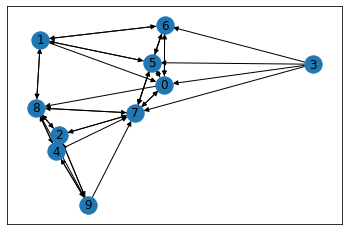

In [21]:
KGraph = ConstructKnnGraph(10, 4)
KGraph.KnnGraph()
KGraph.DrawGraph()

In [40]:
class GraphFramework:
  def __init__(self, inputGraph):
    self.G = inputGraph
    self.edges = self.G.edges()
    self.update = []
    self.vertex = self.G.nodes()
  
  def initProperty(self, srcProp):
    return srcProp

  def reset_nodes_attribute(self):
    for i in self.vertex:
      self.G.add_node(i, accum=0)

  def Scatter(self, weigth=None, srcProp=None):
    return srcProp

  def Gather(self, accum, dst_value):
    return accum + dst_value

  def Apply(self, accum, value):
    return accum

  def run(self):
    iter = 0
    while iter < 2:
      for src, dst in self.edges:
        print("edge=({},{})".format(src,dst))
        srcProp = self.G.nodes[src]['prop']
        srcProp  = self.initProperty(srcProp)
        dst_value = self.Scatter(srcProp=srcProp)
        self.update.append((dst, dst_value))

      self.reset_nodes_attribute()
      for dst, dst_value in self.update:
        print("update=({},{})".format(dst,dst_value))
        accum = self.G.nodes[dst]['accum']
        accum = self.Gather(accum, dst_value)
        self.G.add_node(dst, accum=accum)

      for v in self.vertex:
        accum = self.G.nodes[v]['accum']
        value = self.G.nodes[v]['prop']
        result = self.Apply(accum, value)
        self.G.nodes[v]['prop'] = result
      self.update.clear()
      print(list(self.G.nodes(data=True)))
      iter = iter + 1

In [41]:
G = nx.DiGraph()
for i in range(4):
  G.add_node(i, prop=1)
  G.add_node(i, accum=0)
for i in range(4):
  for j in range(4):
    G.add_edge(i,j)
graphprocess = GraphFramework(G)
graphprocess.run()

edge=(0,0)
edge=(0,1)
edge=(0,2)
edge=(0,3)
edge=(1,0)
edge=(1,1)
edge=(1,2)
edge=(1,3)
edge=(2,0)
edge=(2,1)
edge=(2,2)
edge=(2,3)
edge=(3,0)
edge=(3,1)
edge=(3,2)
edge=(3,3)
update=(0,1)
update=(1,1)
update=(2,1)
update=(3,1)
update=(0,1)
update=(1,1)
update=(2,1)
update=(3,1)
update=(0,1)
update=(1,1)
update=(2,1)
update=(3,1)
update=(0,1)
update=(1,1)
update=(2,1)
update=(3,1)
[(0, {'prop': 4, 'accum': 4}), (1, {'prop': 4, 'accum': 4}), (2, {'prop': 4, 'accum': 4}), (3, {'prop': 4, 'accum': 4})]
edge=(0,0)
edge=(0,1)
edge=(0,2)
edge=(0,3)
edge=(1,0)
edge=(1,1)
edge=(1,2)
edge=(1,3)
edge=(2,0)
edge=(2,1)
edge=(2,2)
edge=(2,3)
edge=(3,0)
edge=(3,1)
edge=(3,2)
edge=(3,3)
update=(0,4)
update=(1,4)
update=(2,4)
update=(3,4)
update=(0,4)
update=(1,4)
update=(2,4)
update=(3,4)
update=(0,4)
update=(1,4)
update=(2,4)
update=(3,4)
update=(0,4)
update=(1,4)
update=(2,4)
update=(3,4)
[(0, {'prop': 16, 'accum': 16}), (1, {'prop': 16, 'accum': 16}), (2, {'prop': 16, 'accum': 16}), (3, {'prop': 1

In [92]:
root = 0
edges = list(nx.bfs_edges(KGraph.G, 0))
nodes = [root] + [v for u, v in edges]
print(len(nodes))
print(nodes)

10
[0, 4, 2, 6, 9, 1, 8, 5, 7, 3]


In [ ]:
G = nx.DiGraph()
data = np.random.rand(10,2)
dataSet = {}
for i in range(data.shape[0]):
  dataSet[i] = data[i]
  G.add_node(i, pos=(data[i][0], data[i][1]))
  print(data[i])

[0.8135964  0.91249162]
[0.05686753 0.32124302]
[0.98859806 0.39388879]
[0.83505196 0.84756349]
[0.69730069 0.52685776]
[0.03301789 0.33515292]
[0.25169853 0.33479391]
[0.71457457 0.45766219]
[0.75080974 0.54800307]
[0.38596624 0.46812933]


In [ ]:
graph_k = 4
for i in range(data.shape[0]):
  query = data[i]
  dist = {}
  for t in range(data.shape[0]):
    if t==i:
      continue
    dist[t] = np.linalg.norm(data[t] - query)
    #print("query={}, nn={}, distance={}".format(i,t,dist))
  vertexSort = sorted(dist.items(), key=lambda dist:dist[1], reverse=False)[:4]
  for vertex in vertexSort:
    G.add_edge(i, vertex[0])
    print("edge=({},{})".format(i, vertex[0]))

edge=(0,3)
edge=(0,8)
edge=(0,4)
edge=(0,7)
edge=(1,5)
edge=(1,6)
edge=(1,9)
edge=(1,7)
edge=(2,7)
edge=(2,8)
edge=(2,4)
edge=(2,3)
edge=(3,0)
edge=(3,8)
edge=(3,4)
edge=(3,7)
edge=(4,8)
edge=(4,7)
edge=(4,9)
edge=(4,2)
edge=(5,1)
edge=(5,6)
edge=(5,9)
edge=(5,4)
edge=(6,9)
edge=(6,1)
edge=(6,5)
edge=(6,7)
edge=(7,4)
edge=(7,8)
edge=(7,2)
edge=(7,9)
edge=(8,4)
edge=(8,7)
edge=(8,2)
edge=(8,3)
edge=(9,6)
edge=(9,4)
edge=(9,7)
edge=(9,1)


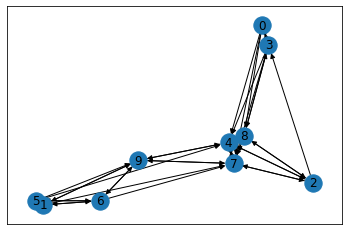

In [ ]:
node_pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx(G, node_pos)
# Show the plot
plt.show()

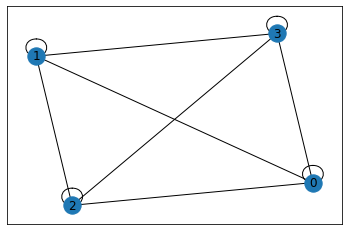

In [26]:
G = nx.Graph()
for i in range(4):
  G.add_node(i, prop=1)
  G.add_node(i, accum=0)
for i in range(4):
  for j in range(4):
    G.add_edge(i,j)
'''
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(1,2)
G.add_edge(2,0)
G.add_edge(2,3)
G.add_edge(3,3)
'''
nx.draw_networkx(G)

In [11]:
edges = G.edges()
for src, dst in G.edges():
  print(src)
  print(dst)

0
1
0
2
1
2
2
3
3
3


In [5]:
root = 2
edges = list(nx.bfs_edges(G, root))
nodes = [root] + [v for u, v in edges]
print(len(nodes))
print(nodes)

4
[2, 0, 1, 3]
